In [68]:
import pandas as  pd
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats
from sklearn.preprocessing import StandardScaler,OneHotEncoder,LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report, roc_curve, auc
from sklearn.model_selection import cross_val_score, GridSearchCV

In [19]:
df = pd.read_csv(r"C:\Users\DELL\Downloads\Copper_Set.xlsx - Result 1.csv")


In [21]:
df.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181672 non-null  float64
 2   quantity tons  181673 non-null  object 
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 10  material_ref   103754 non-null  object 
 11  product_ref    181673 non-null  int64  
 12  delivery date  181672 non-null  float64
 13  selling_price  181672 non-null  float64
dtypes: float64(8), int64(1), object(5)
memory usage: 19.4+ MB


In [29]:
continuous_vars = df.select_dtypes(include=['number']).columns.tolist()
continuous_vars

['item_date',
 'customer',
 'country',
 'application',
 'thickness',
 'width',
 'product_ref',
 'delivery date',
 'selling_price']

In [30]:
continuous_stats = df[continuous_vars].describe()
continuous_stats

,item_date,customer,country,application,thickness,width,product_ref,delivery date,selling_price
count,1.816720e+05,1.816720e+05,181645.000000,181649.000000,181672.000000,181673.000000,1.816730e+05,1.816720e+05,1.816720e+05
mean,2.020459e+07,3.051221e+07,44.893022,25.615809,2.564827,1295.286724,4.739679e+08,2.020738e+07,1.918036e+03
std,4.551119e+03,2.433382e+07,24.404214,17.754175,6.572321,261.631754,7.175101e+08,2.411059e+04,3.317956e+05
min,1.995000e+07,1.245800e+04,25.000000,2.000000,0.180000,1.000000,6.117280e+05,2.019040e+07,-1.160000e+03
25%,2.020093e+07,3.019688e+07,26.000000,10.000000,0.700000,1180.000000,6.119930e+05,2.020110e+07,6.690000e+02
50%,2.020113e+07,3.020524e+07,30.000000,15.000000,1.500000,1250.000000,6.406650e+05,2.021010e+07,8.120000e+02
75%,2.021020e+07,3.028042e+07,78.000000,41.000000,3.000000,1500.000000,1.332077e+09,2.021040e+07,9.530000e+02
max,2.021040e+07,2.147484e+09,113.000000,99.000000,2500.000000,2990.000000,1.722208e+09,3.031010e+07,1.000010e+08


In [31]:
df.isna().sum()

id                   2
item_date            1
quantity tons        0
customer             1
country             28
status               2
item type            0
application         24
thickness            1
width                0
material_ref     77919
product_ref          0
delivery date        1
selling_price        1
dtype: int64

In [39]:
#Dealing the missing values for material ref(00000)

material_null = df["material_ref"].str.startswith("000000")
replace_null=(material_null==True)
df['material_ref'][replace_null]=np.NaN


In [41]:
df["material_ref"].isnull().sum()

100645

In [44]:
mode_1 = df["material_ref"].mode()[0]
df["material_ref"].fillna(mode_1, inplace =True)
df["material_ref"].isnull().sum()

0

In [45]:
df['customer'].fillna(df['customer'].mean(), inplace = True)
df['country'].fillna(df['country'].mean(), inplace = True)
df['application'].fillna(df['application'].mean(), inplace = True)
df['selling_price'].fillna(df['selling_price'].mean(), inplace = True)
df['delivery date'].fillna(df['delivery date'].mean(), inplace = True)

df['status'].fillna(df['status'].mode()[0], inplace = True)
df['item_date'].fillna(df['item_date'].mode()[0], inplace = True)

df['thickness'].fillna(df['thickness'].median(), inplace = True)

In [47]:
df.dropna(inplace=True)
df.isnull().sum()

id               0
item_date        0
quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
material_ref     0
product_ref      0
delivery date    0
selling_price    0
dtype: int64

In [48]:
df.drop_duplicates(inplace=True)

In [49]:
#converting quantity value to numeric float type
df['quantity tons'] = pd.to_numeric(df['quantity tons'], errors='coerce')
df['item_date'] = pd.to_datetime(df['item_date'])
df['delivery date'] = pd.to_datetime(df['delivery date'])

In [51]:
#categorical variables
categorical_col=['status','item type','material_ref','product_ref']
#continuous variable
Continues_col = ['quantity tons','customer','country','application','thickness','width','selling_price']

In [52]:
for i in Continues_col:
    print(i,"--",df[i].skew())

quantity tons -- 424.6873099371783
customer -- 86.98482927867795
country -- 0.753635242319479
application -- 0.7244124224588578
thickness -- 303.4460810163655
width -- 0.37458349935712015
selling_price -- 301.3864288924798


In [53]:
#IQR DETECTION
def outliers_IQR(data_1):
    q1=data_1.quantile(0.25)
    q3=data_1.quantile(0.75)
    IQR=q3-q1
    low_r=(q1-1.5*IQR)
    high_r=(q3+1.5*IQR)
    outliers = data_1[((data_1<(low_r)) | (data_1>(high_r)))]
    return outliers,low_r,high_r

In [54]:
qt_outlier,qt_low,qt_high=outliers_IQR(df['quantity tons'])

app_outliers,app_low,app_upper=outliers_IQR(df['application'])

thickness_outliers,thickness_low,thickness_upper=outliers_IQR(df['thickness'])

width_outliers,width_low,width_upper=outliers_IQR(df['width'])

selling_outliers,selling_low,selling_upper=outliers_IQR(df['selling_price'])

In [55]:
min(selling_outliers),max(selling_outliers)

(-1160.0, 100001015.0)

In [56]:
df['selling_price_out']=df['selling_price']
df['selling_price_out'] = np.where(df['selling_price_out'] >selling_upper, selling_upper,df['selling_price_out'])
df['selling_price_out'] = np.where(df['selling_price_out'] <selling_low, selling_low,df['selling_price_out'])

In [57]:
df['selling_price_out'].skew()

0.13659230260245983

In [58]:
df['quantity tons_log']=np.log(df['quantity tons'])

df['thickness_log'] = np.log(df['thickness'])

In [59]:
df['quantity tons_log'].skew(),df['thickness_log'].skew()

(-0.06878249132733075, 0.3514353999155478)

In [60]:
Continues_col_out = ['quantity tons_log','customer','country','application','thickness_log','width','selling_price_out']

In [61]:
for i in Continues_col_out:
    print(i,"--",df[i].skew())

quantity tons_log -- -0.06878249132733075
customer -- 86.98482927867795
country -- 0.753635242319479
application -- 0.7244124224588578
thickness_log -- 0.3514353999155478
width -- 0.37458349935712015
selling_price_out -- 0.13659230260245983


<Axes: xlabel='quantity tons'>

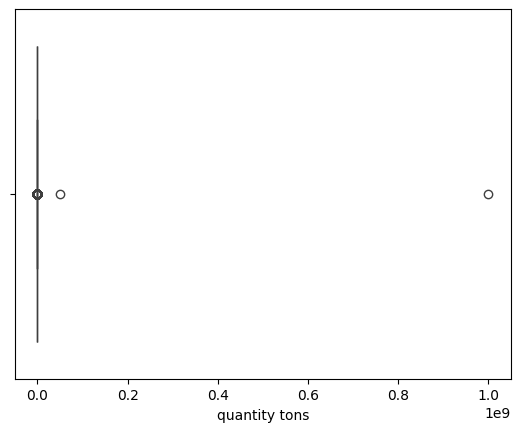

In [69]:
sns.boxplot(x=df['quantity tons'])

<Axes: xlabel='quantity tons_log'>

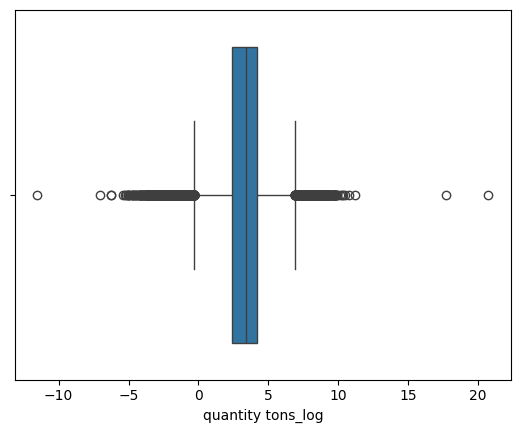

In [71]:
sns.boxplot(x=df['quantity tons_log'])

In [72]:
cols_plot=['quantity tons','quantity tons_log',
       'thickness','thickness_log','selling_price','selling_price_out']

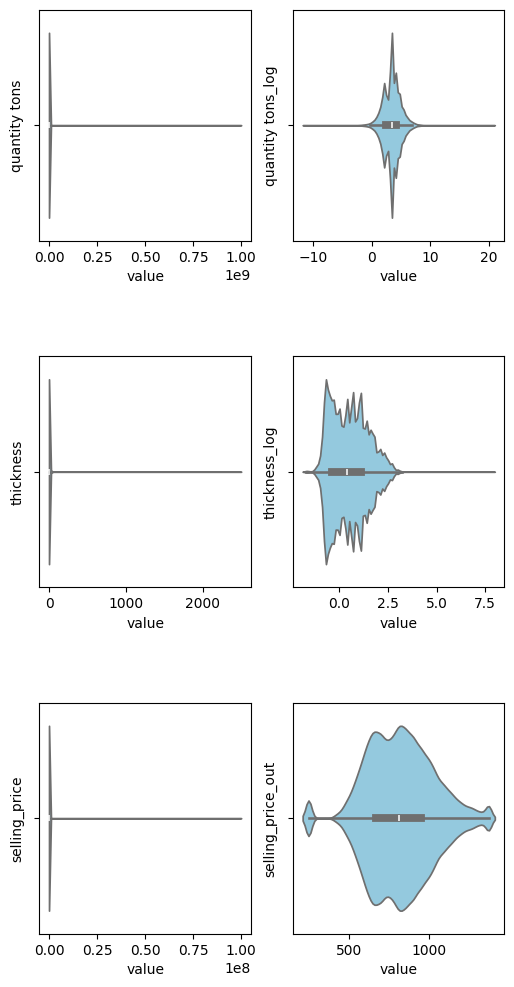

Text(0.5, 0.98, 'VIOLIN PLOT CONTINUOUS VARIABLE')

<Figure size 640x480 with 0 Axes>

In [73]:
# Select the features for the violin plot
fig, ax = plt.subplots((len(cols_plot)+1)//2, 2, figsize=(6, 12))
ax=ax.ravel()
for i, feature in enumerate(cols_plot):
    sns.violinplot(data=df, x=feature, ax=ax[i], color='skyblue')
    ax[i].set_xlabel('value')
    ax[i].set_ylabel(feature)
#sns.violinplot(data=df, x='selling_price_out', ax=ax[-1], color='skyblue')
# Adjust the spacing between the subplots
plt.subplots_adjust(hspace=0.5)
plt.show()
plt.suptitle("VIOLIN PLOT CONTINUOUS VARIABLE")

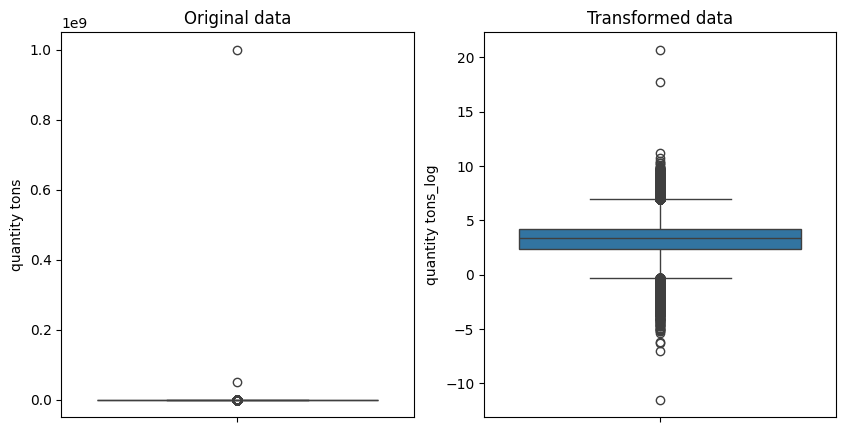

In [74]:
# Plot the original and transformed variables
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.boxplot(df['quantity tons'], ax=ax[0])
sns.boxplot(df['quantity tons_log'], ax=ax[1])
ax[0].set_title("Original data")
ax[1].set_title("Transformed data")
plt.show()

<Axes: xlabel='thickness_log', ylabel='Density'>

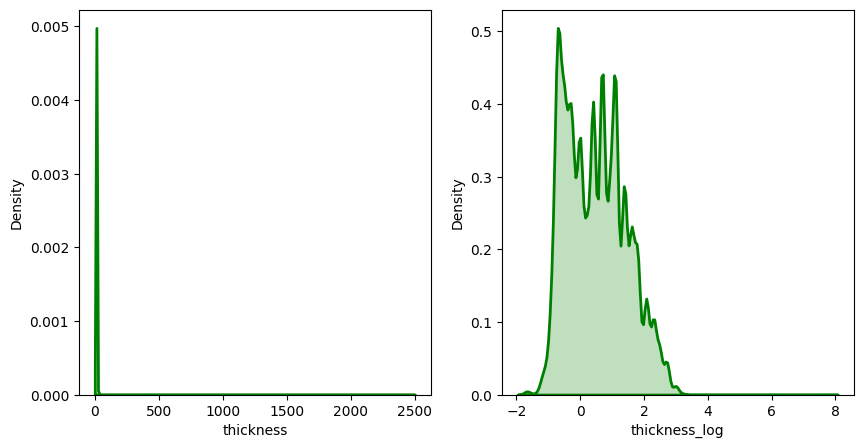

In [75]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.distplot(df['thickness'], hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Normal", color ="green", ax=ax[0])
sns.distplot(df['thickness_log'], hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Normal", color ="green", ax=ax[1])

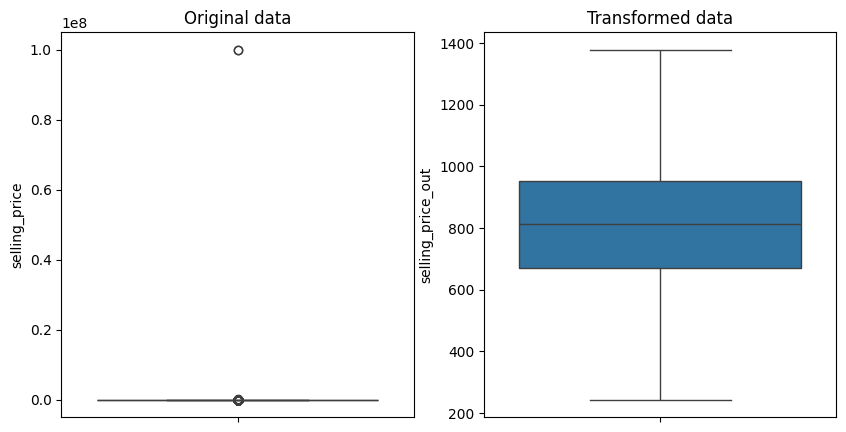

In [76]:
# Plot the original and transformed variables
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.boxplot(df['selling_price'], ax=ax[0])
sns.boxplot(df['selling_price_out'], ax=ax[1])
ax[0].set_title("Original data")
ax[1].set_title("Transformed data")
plt.show()

<Axes: xlabel='quantity tons_log', ylabel='Density'>

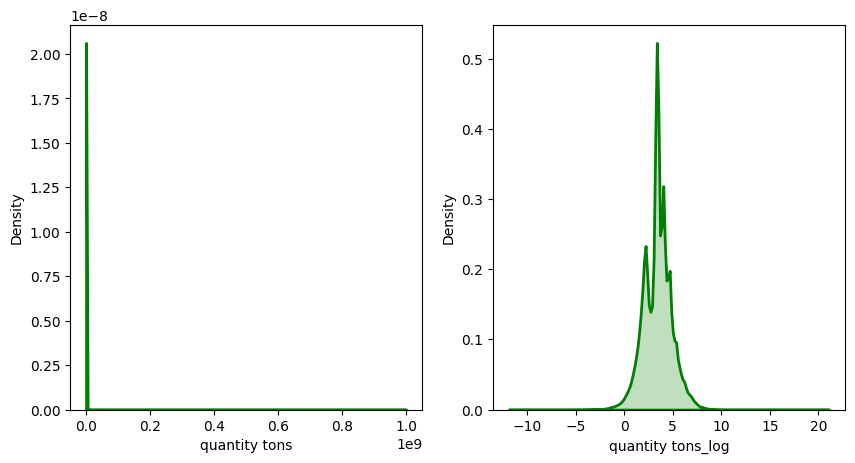

In [77]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.distplot(df['quantity tons'], hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Normal", color ="green", ax=ax[0])
sns.distplot(df['quantity tons_log'], hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Normal", color ="green", ax=ax[1])

<Axes: xlabel='selling_price_out', ylabel='Density'>

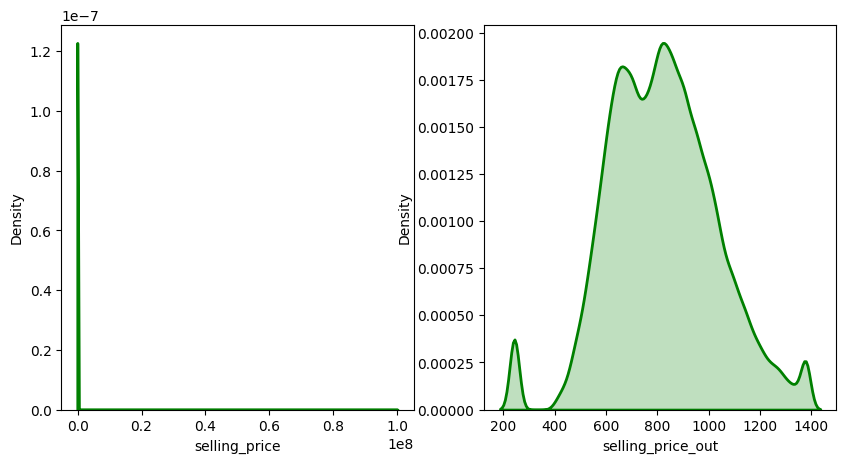

In [78]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.distplot(df['selling_price'], hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Normal", color ="green", ax=ax[0])
sns.distplot(df['selling_price_out'], hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Normal", color ="green", ax=ax[1])

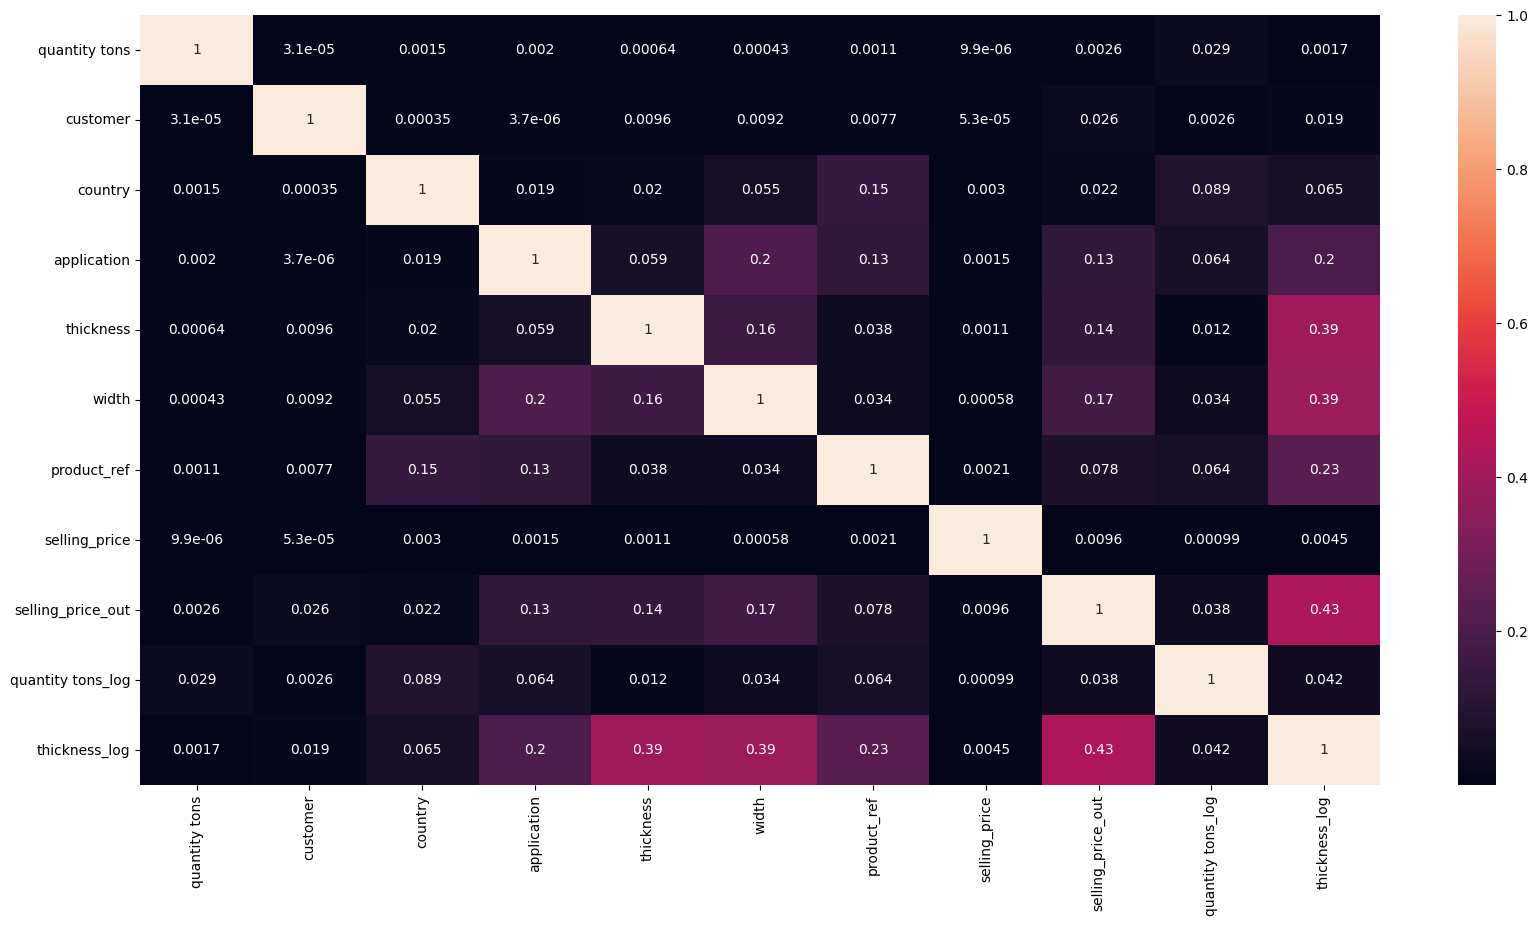

In [79]:
# Select only numeric columns from your DataFrame
numeric_data = df.select_dtypes(include=[np.number])

# Create a correlation matrix for numeric columns
correlation_matrix = numeric_data.corr().abs()
#if this code not working add [255] code top of this code
# Create a heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True)
plt.show()

In [80]:
df.columns

Index(['id', 'item_date', 'quantity tons', 'customer', 'country', 'status',
       'item type', 'application', 'thickness', 'width', 'material_ref',
       'product_ref', 'delivery date', 'selling_price', 'selling_price_out',
       'quantity tons_log', 'thickness_log'],
      dtype='object')

In [81]:
df.isna().sum()

id                   0
item_date            0
quantity tons        1
customer             0
country              0
status               0
item type            0
application          0
thickness            0
width                0
material_ref         0
product_ref          0
delivery date        0
selling_price        0
selling_price_out    0
quantity tons_log    5
thickness_log        0
dtype: int64

In [82]:
df.dropna(inplace=True)

In [83]:
# encoding categorical variables
ohe = OneHotEncoder(handle_unknown='ignore')
ohe.fit(df[['item type']])
X_ohe = ohe.fit_transform(df[['item type']]).toarray()
ohe2 = OneHotEncoder(handle_unknown='ignore')
ohe2.fit(df[['status']])
X_be = ohe2.fit_transform(df[['status']]).toarray()

In [84]:
min(df['quantity tons']),max(df['quantity tons'])

(1e-05, 1000000000.0)

In [85]:
# independent features after encoding
X = np.concatenate((df[['quantity tons_log',
                       'application',
                       'thickness_log',
                       'width','country',
                       'customer',
                       'product_ref']].values, X_ohe, X_be), axis=1)

y=df['selling_price_out']

In [86]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [87]:
# test and train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [88]:
# Building the model
extra_tree_model = ExtraTreesRegressor()

In [89]:
#training the model
et=extra_tree_model.fit(X_train, y_train)
#evaluting model
predict_val=extra_tree_model.predict(X_test)

In [90]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
MAE=mean_absolute_error(y_test,predict_val)
MSE=mean_squared_error(y_test,predict_val)
r2 = r2_score(y_test,predict_val)

print("MAE :",MAE,"\nMSE :",MSE,"\nR2 :",r2)

MAE : 85.04767370048255 
MSE : 14709.377504904092 
R2 : 0.66474230338214


In [91]:
from sklearn.linear_model import LinearRegression

In [92]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [93]:
y_pred = model.predict(X_test)
y_pred

array([724.40767016, 701.72505297, 726.56782641, ..., 749.50630297,
       718.97212328, 962.98579516])

In [94]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r_squared}")

Mean Squared Error: 28802.661971935522
R-squared: 0.34352666481266614


In [95]:
print(len(X_test))
print(len(y_test))

18167
18167


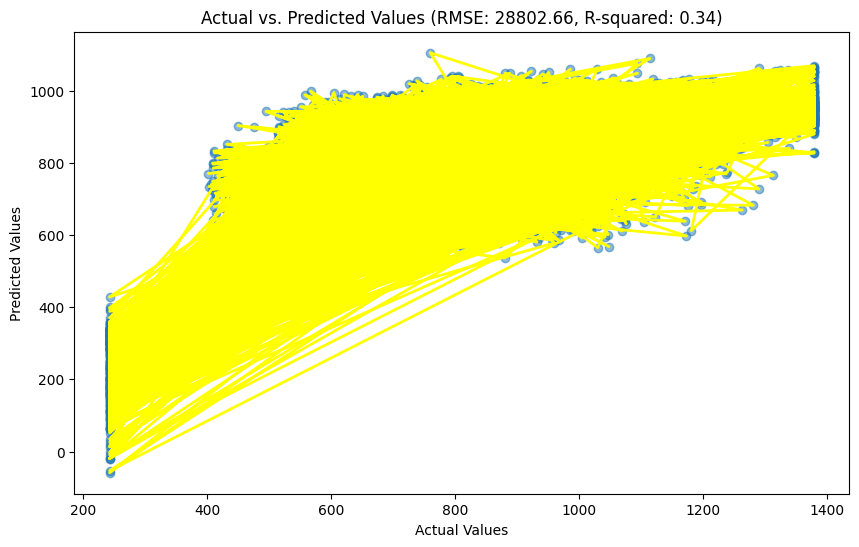

In [96]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot(y_test, y_pred, color='yellow', linewidth=2)
plt.title(f'Actual vs. Predicted Values (RMSE: {mse:.2f}, R-squared: {r_squared:.2f})')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

In [97]:
df.columns

Index(['id', 'item_date', 'quantity tons', 'customer', 'country', 'status',
       'item type', 'application', 'thickness', 'width', 'material_ref',
       'product_ref', 'delivery date', 'selling_price', 'selling_price_out',
       'quantity tons_log', 'thickness_log'],
      dtype='object')

In [98]:
df['status'].value_counts()

status
Won                116007
Lost                34438
Not lost for AM     19573
Revised              4276
To be approved       4169
Draft                3139
Offered                53
Offerable              10
Wonderful               1
Name: count, dtype: int64

In [99]:
# hyperparameters
param_grid = {'max_depth': [2, 5, 10, 20],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4],
              'max_features': ['auto', 'sqrt', 'log2']}
# gridsearchcv
grid_search = GridSearchCV(estimator=extra_tree_model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best hyperparameters:", grid_search.best_params_)

Best hyperparameters: {'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2}


In [100]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

In [101]:
# evalution metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean squared error:', mse)
print('R-squared:', r2)

Mean squared error: 16368.665244747292
R-squared: 0.6269236407296503


In [102]:
# Saving the model
import pickle
with open('model.pkl', 'wb') as file:
    pickle.dump(best_model, file)
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
with open('t.pkl', 'wb') as f:
    pickle.dump(ohe, f)
with open('s.pkl', 'wb') as f:
    pickle.dump(ohe2, f)

In [ ]:
# ['quantity tons_log', 'application', 'thickness_log', 'width','country','customer','product_ref']].values, X_ohe, X_be
new_sample = np.array([[np.log(10), 10, np.log(240), 0, 28,30202938,1670798778,'PL','Won']])
new_sample_ohe = ohe.transform(new_sample[:, [7]]).toarray()
new_sample_be = ohe2.transform(new_sample[:, [8]]).toarray()
new_sample = np.concatenate((new_sample[:, [0,1,2, 3, 4, 5, 6,]], new_sample_ohe, new_sample_be), axis=1)
new_sample1 = scaler.transform(new_sample)
new_pred = best_model.predict(new_sample1)
print('Predicted selling price:', (new_pred))

In [103]:
df_c = df[df['status'].isin(['Won', 'Lost'])]
df_class=df_c[[ 'customer','country',
               'item type','application','width',
               'product_ref','selling_price_out',
               'quantity tons_log','thickness_log']]
Y=df_c['status']

In [104]:
len(Y)

150445

In [105]:
# encoding categorical variables
ohe = OneHotEncoder(handle_unknown='ignore')
ohe.fit(df_class[['item type']])
X_ohe = ohe.fit_transform(df_class[['item type']]).toarray()

In [106]:
be = LabelBinarizer()
be.fit(Y) 
Y_fit = be.fit_transform(Y)

In [107]:
# independent features after encoding
X = np.concatenate((df_class[[ 'customer','country',
               'application','width',
               'product_ref','selling_price_out',
               'quantity tons_log','thickness_log']].values, X_ohe), axis=1)
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, Y_fit, test_size=0.2, random_state=42)

In [109]:
# Building the model
extra_tree_model_class = ExtraTreesClassifier()

In [110]:
extra_tree_model_class.fit(X_train, y_train)

ExtraTreesClassifier()

In [111]:
y_pred = extra_tree_model_class.predict(X_test)

In [112]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
cm = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{cm}")

Accuracy: 0.9294094187244508
Confusion Matrix:
[[ 5738  1184]
 [  940 22227]]


In [ ]:
print(classification_report(y_test, y_pred))

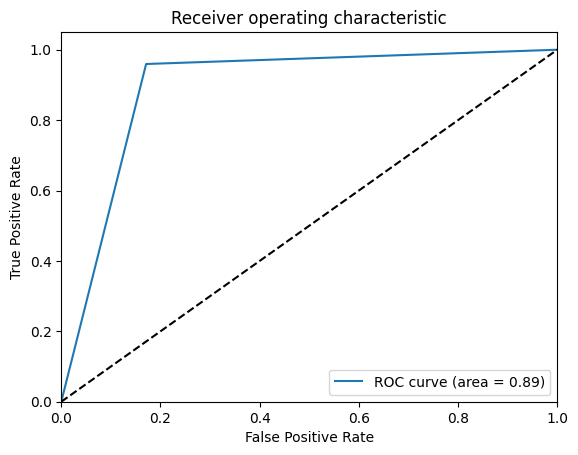

In [113]:
# ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [114]:
# Saving the model
import pickle
with open('cmodel.pkl', 'wb') as file:
    pickle.dump(extra_tree_model_class, file)
with open('cscaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
with open('ct.pkl', 'wb') as f:
    pickle.dump(ohe, f)

In [116]:
customer=30202938
country=28.0
application =10.0
width =1500
product_ref = 1670798778
selling_price_out =956
quantity_tons_log =np.log(700)
thickness_log =np.log(2)
status='W'

In [117]:
# Predict the status for a new sample
# 'quantity tons_log', 'selling_price_log','application', 'thickness_log', 'width','country','customer','product_ref']].values, X_ohe
new_sample = np.array([[customer, country, application, width,product_ref,selling_price_out,quantity_tons_log,thickness_log,status]])
new_sample_ohe = ohe.transform(new_sample[:, [8]]).toarray()
new_sample = np.concatenate((new_sample[:, [0,1,2, 3, 4, 5, 6,7]], new_sample_ohe), axis=1)
new_sample = scaler.transform(new_sample)
new_pred = extra_tree_model_class.predict(new_sample)
if new_pred==1:
    print('The status is: Won')
else:
    print('The status is: Lost')

The status is: Won
